In [3]:
import os
import sys

sys.path.append('/workspace/unsupervised-truth-probes/src')
sys.path.append('/workspace/unsupervised-truth-probes')
sys.path.append('/workspace/promptsource')
sys.path.append('/workspace/promptsource/promptsource')

os.environ["HF_TOKEN"] = "<your-api-key>"

# Set all Hugging Face cache directories to workspace
cache_dir = '/workspace/huggingface_cache'
os.environ['HF_HOME'] = cache_dir
os.environ['TRANSFORMERS_CACHE'] = cache_dir
os.environ['HF_DATASETS_CACHE'] = cache_dir

from src.evals import *
from src.methods import *
from src.plotting import *

Split: 100 train, 100 test examples
Some results missing, computing activations...
Loading model: meta-llama/Llama-2-13b-chat-hf
Detected positive token: 'True' (ID: 5852)
Detected negative token: 'False' (ID: 7700)
Computing activations for all prompts...


Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Running method: supervised


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Running method: ccs


Training CCS:   0%|          | 0/1000 [00:00<?, ?it/s]

Final loss = 0.018473
Running method: fabiens_method
Starting Fabien co-training: 100 samples, 20 iterations


Fabien Co-Training:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/256 [00:00<?, ?it/s]

Training complete. Final labels: 45/100 positive
Running method: random


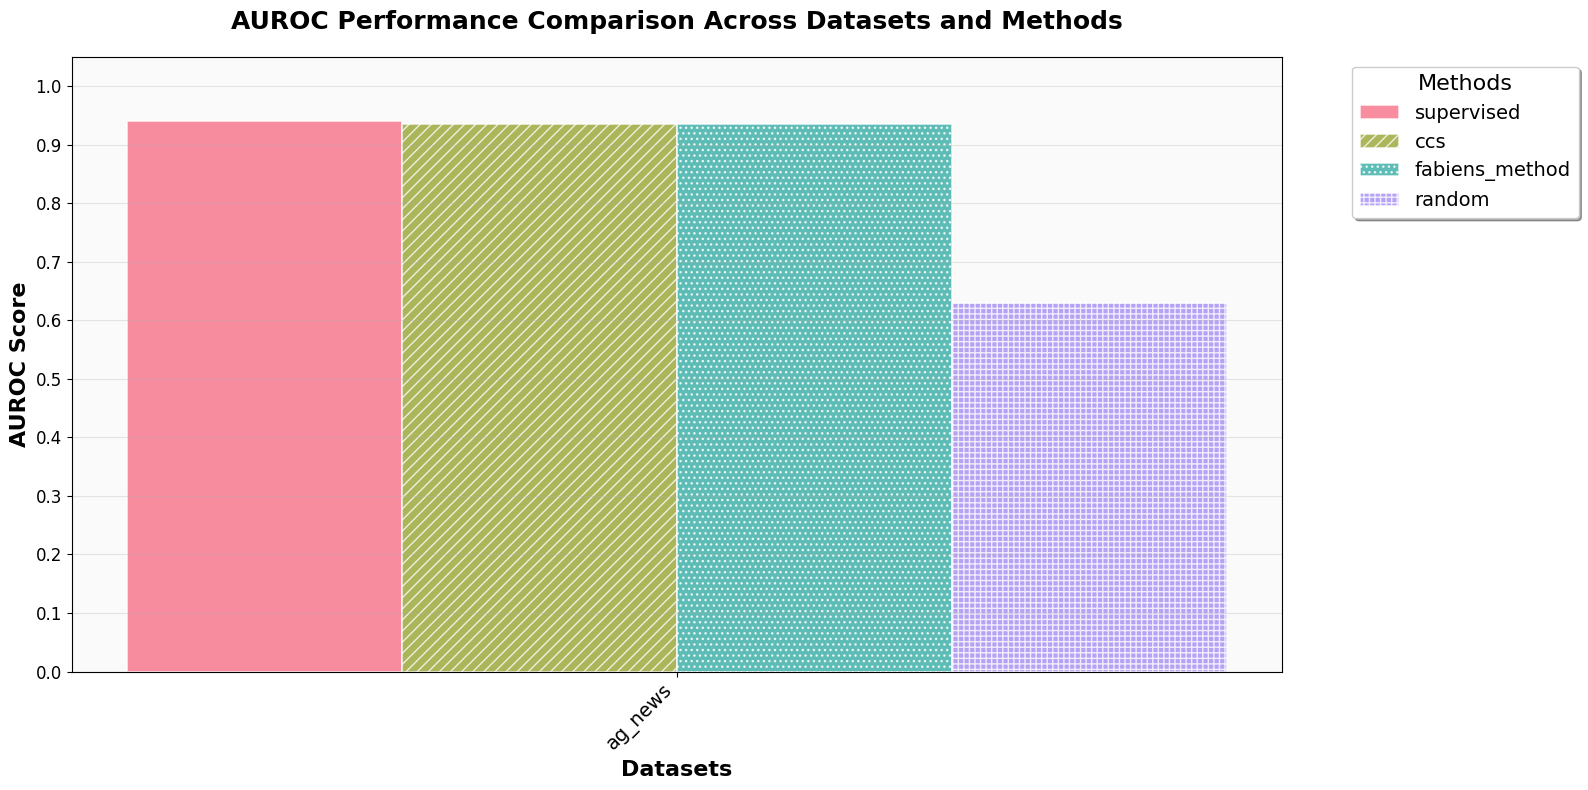

In [4]:
all_available_datasets = [
    # "boolq",
    # "dbpedia_14",
    # "imdb",
    "ag_news",
    # "amazon_polarity",
    # "piqa",
    #"got_sp_en_trans", # Empty for some reason
    # "rte",
    #"got_larger_than",
    #"got_cities",
    #"copa",
]

#model_name = "meta-llama/Llama-2-13b-hf"
#model_name = "meta-llama/Llama-3.1-8B"
model_name = "meta-llama/Llama-2-13b-chat-hf"
    
all_results_dict = {}
for dataset_name in all_available_datasets:
    dataset = load_dataset_for_ccs(
        dataset_name=dataset_name,
        split="train", 
        max_examples=200,
        seed=42,
    )
    all_results_dict[dataset_name] = get_results_on_dataset(
        dataset=dataset,
        model_name=model_name,
        layer_idx=33,
        batch_size=8,
        run_methods=[
            "supervised",
            "ccs",
            "fabiens_method",
            "random",
            
        ]
    )

# Option 1: Modern bar plot
fig1, ax1 = plot_auroc_comparison(all_results_dict, style='modern')
plt.show()